# **How Much is Your Car Worth?** 

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("/content/car_data (2).csv")

In [3]:
od=df.copy()

# Data Cleaning

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

# Outliers

In [8]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fc1c88e2f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1c8553f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1c85c54d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1c855fa10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1c8553490>,
  <matplotlib.lines.Line2D at 0x7fc1c85539d0>]}

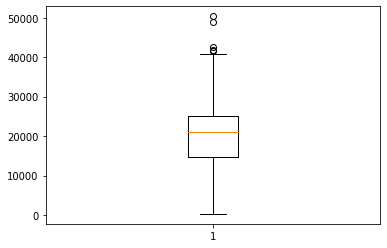

In [9]:
plt.boxplot(df['Mileage'])

In [10]:
percentile25 = df['Mileage'].quantile(0.25)
percentile75 = df['Mileage'].quantile(0.75)
iqr=percentile75 - percentile25
print("IQR is ",iqr)
print("25th Percentile of the Mileage data--->",percentile25)
print("75th Percentile of the Mileage data--->",percentile75)

IQR is  10589.5
25th Percentile of the Mileage data---> 14623.5
75th Percentile of the Mileage data---> 25213.0


In [11]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper_limit ----->",upper_limit)
print("lower_limit ----->",lower_limit)

upper_limit -----> 41097.25
lower_limit -----> -1260.75


In [12]:
df['Mileage'] = np.where(df['Mileage']>upper_limit,upper_limit,df['Mileage'])
df['Mileage'] = np.where(df['Mileage']<lower_limit,lower_limit,df['Mileage'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fc1c80bb750>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1c80c3750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1c804b790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1c804b250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1c80bbc90>,
  <matplotlib.lines.Line2D at 0x7fc1c80c3210>]}

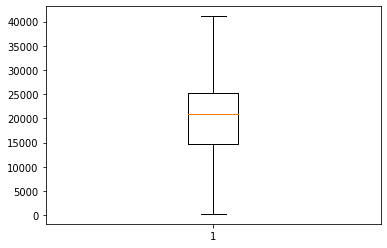

In [13]:
plt.boxplot(df['Mileage'])

# EDA

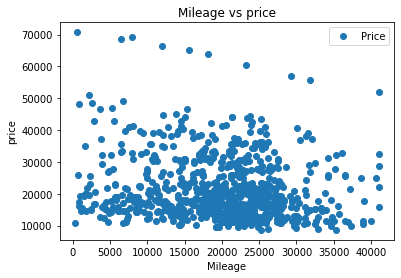

,Mileage,Price
Mileage,1.000000,-0.146283
Price,-0.146283,1.000000


In [14]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs price')
plt.xlabel('Mileage')
plt.ylabel('price')
plt.show()
df[['Mileage','Price']].corr()

# There is no linear relationship.So, transforming.

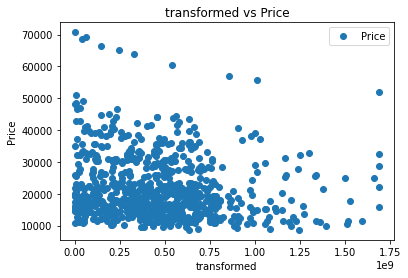

,transformed,Price
transformed,1.000000,-0.125361
Price,-0.125361,1.000000


In [15]:
df['transformed'] = np.square(df['Mileage'])#transofrming
df.plot(x='transformed', y='Price', style='o')
plt.title('transformed vs Price')
plt.xlabel('transformed')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

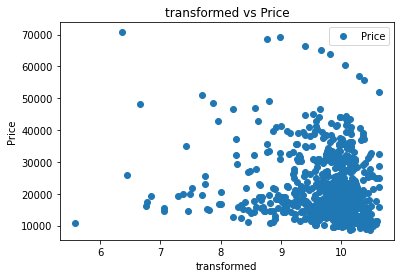

,transformed,Price
transformed,1.000000,-0.146153
Price,-0.146153,1.000000


In [16]:
df['transformed'] = np.log(df['Mileage'])#transofrming
df.plot(x='transformed', y='Price', style='o')
plt.title('transformed vs Price')
plt.xlabel('transformed')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


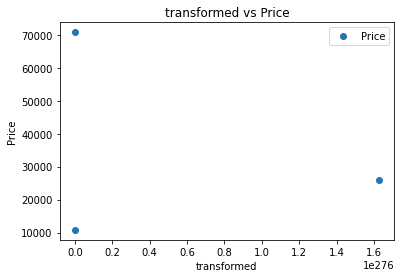

,transformed,Price
transformed,NaN,-0.0
Price,-0.0,1.0


In [17]:
df['transformed'] = np.exp(df['Mileage'])#transofrming
df.plot(x='transformed', y='Price', style='o')
plt.title('transformed vs Price')
plt.xlabel('transformed')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

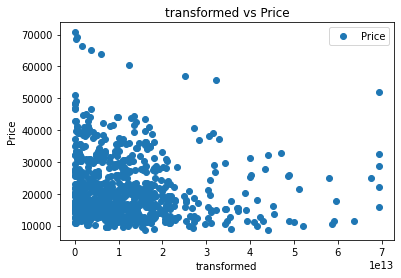

,transformed,Price
transformed,1.000000,-0.099925
Price,-0.099925,1.000000


In [18]:
df['transformed'] = np.power(df['Mileage'],3)#transofrming
df.plot(x='transformed', y='Price', style='o')
plt.title('transformed vs Price')
plt.xlabel('transformed')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

# There is no linear Relationship Between Mileage and price even after the transformation.So, cannot apply Linear Regression.

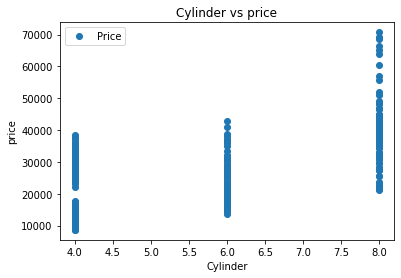

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [19]:
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs price')
plt.xlabel('Cylinder')
plt.ylabel('price')
plt.show()
df[['Cylinder','Price']].corr()

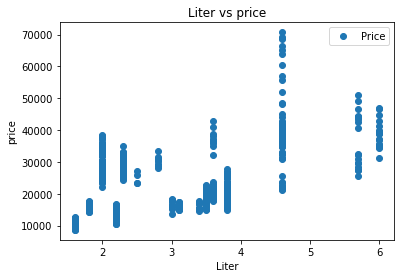

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [20]:
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs price')
plt.xlabel('Liter')
plt.ylabel('price')
plt.show()
df[['Liter','Price']].corr()

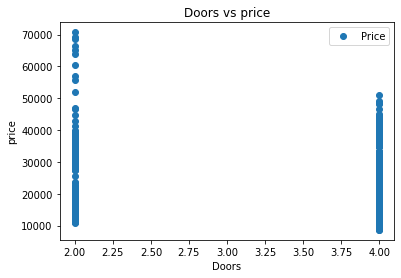

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [21]:
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs price')
plt.xlabel('Doors')
plt.ylabel('price')
plt.show()
df[['Doors','Price']].corr()

# There is no linear realtionship between Doors and price.So,Transforming

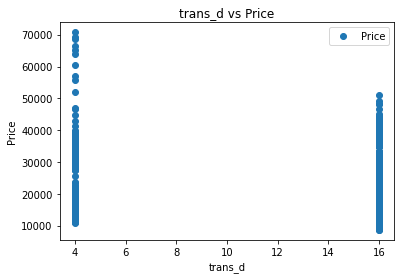

,trans_d,Price
trans_d,1.00000,-0.13875
Price,-0.13875,1.00000


In [22]:
df['trans_d'] = np.square(df['Doors'])#transofrming
df.plot(x='trans_d', y='Price', style='o')
plt.title('trans_d vs Price')
plt.xlabel('trans_d')
plt.ylabel('Price')
plt.show()
df[['trans_d','Price']].corr()

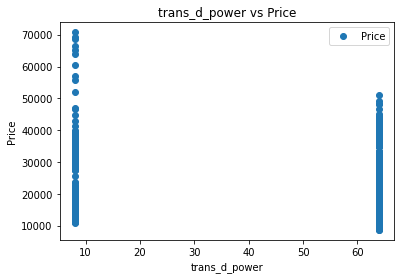

,trans_d_power,Price
trans_d_power,1.00000,-0.13875
Price,-0.13875,1.00000


In [23]:
df['trans_d_power'] = np.power(df['Doors'],3)#transofrming
df.plot(x='trans_d_power', y='Price', style='o')
plt.title('trans_d_power vs Price')
plt.xlabel('trans_d_power')
plt.ylabel('Price')
plt.show()
df[['trans_d_power','Price']].corr()

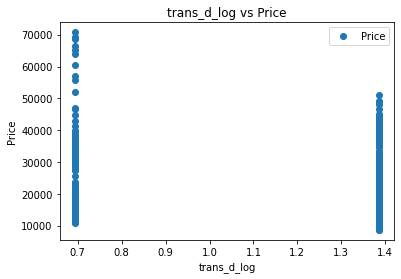

,trans_d_log,Price
trans_d_log,1.00000,-0.13875
Price,-0.13875,1.00000


In [24]:
df['trans_d_log'] = np.log(df['Doors'])#transofrming
df.plot(x='trans_d_log', y='Price', style='o')
plt.title('trans_d_log vs Price')
plt.xlabel('trans_d_log')
plt.ylabel('Price')
plt.show()
df[['trans_d_log','Price']].corr()

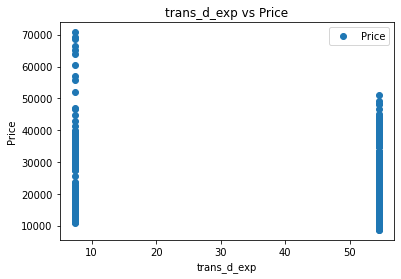

,trans_d_exp,Price
trans_d_exp,1.00000,-0.13875
Price,-0.13875,1.00000


In [25]:
df['trans_d_exp'] = np.exp(df['Doors'])#transofrming
df.plot(x='trans_d_exp', y='Price', style='o')
plt.title('trans_d_exp vs Price')
plt.xlabel('trans_d_exp')
plt.ylabel('Price')
plt.show()
df[['trans_d_exp','Price']].corr()

# There is no linear relationship even after the transformation.so,cannot apply linear regression.

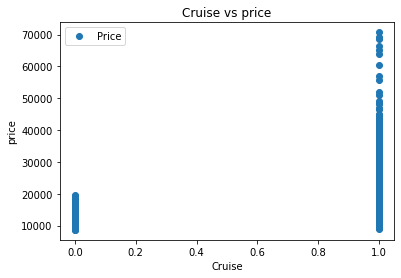

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [26]:
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs price')
plt.xlabel('Cruise')
plt.ylabel('price')
plt.show()
df[['Cruise','Price']].corr()

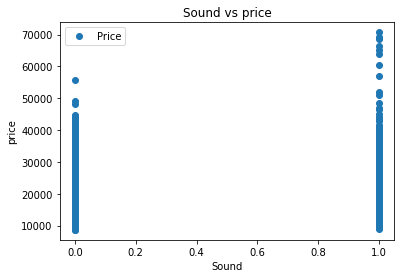

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [27]:
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs price')
plt.xlabel('Sound')
plt.ylabel('price')
plt.show()
df[['Sound','Price']].corr()

# There is no linear realtionship between Sound and price.So,Transforming

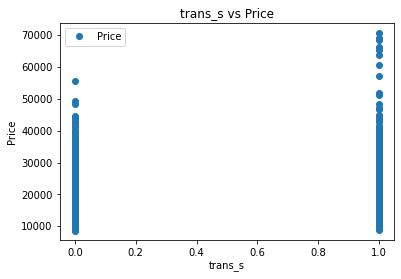

,trans_s,Price
trans_s,1.000000,-0.124348
Price,-0.124348,1.000000


In [28]:
df['trans_s'] = np.square(df['Sound'])#transofrming
df.plot(x='trans_s', y='Price', style='o')
plt.title('trans_s vs Price')
plt.xlabel('trans_s')
plt.ylabel('Price')
plt.show()
df[['trans_s','Price']].corr()

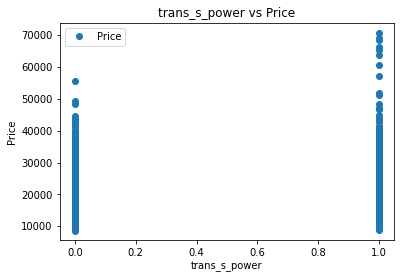

,trans_s_power,Price
trans_s_power,1.000000,-0.124348
Price,-0.124348,1.000000


In [29]:
df['trans_s_power'] = np.power(df['Sound'],3)#transofrming
df.plot(x='trans_s_power', y='Price', style='o')
plt.title('trans_s_power vs Price')
plt.xlabel('trans_s_power')
plt.ylabel('Price')
plt.show()
df[['trans_s_power','Price']].corr()

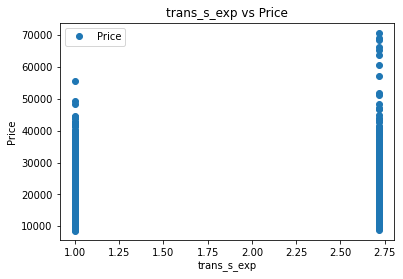

,trans_s_exp,Price
trans_s_exp,1.000000,-0.124348
Price,-0.124348,1.000000


In [30]:
df['trans_s_exp'] = np.exp(df['Sound'])#transofrming
df.plot(x='trans_s_exp', y='Price', style='o')
plt.title('trans_s_exp vs Price')
plt.xlabel('trans_s_exp')
plt.ylabel('Price')
plt.show()
df[['trans_s_exp','Price']].corr()

# There is no linear relationship even after the transformation.so,cannot apply linear regression.

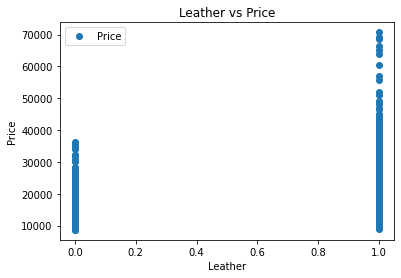

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [31]:
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()
df[['Leather','Price']].corr()

# There is no linear realtionship between Leather and price.So,Transforming.

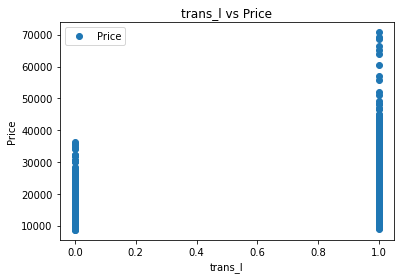

,trans_l,Price
trans_l,1.000000,0.157197
Price,0.157197,1.000000


In [32]:
df['trans_l'] = np.square(df['Leather'])#transofrming
df.plot(x='trans_l', y='Price', style='o')
plt.title('trans_l vs Price')
plt.xlabel('trans_l')
plt.ylabel('Price')
plt.show()
df[['trans_l','Price']].corr()

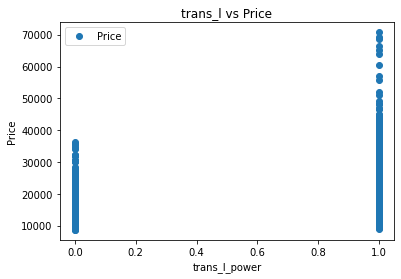

,trans_l_power,Price
trans_l_power,1.000000,0.157197
Price,0.157197,1.000000


In [33]:
df['trans_l_power'] = np.power(df['Leather'],3)#transofrming
df.plot(x='trans_l_power', y='Price', style='o')
plt.title('trans_l vs Price')
plt.xlabel('trans_l_power')
plt.ylabel('Price')
plt.show()
df[['trans_l_power','Price']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


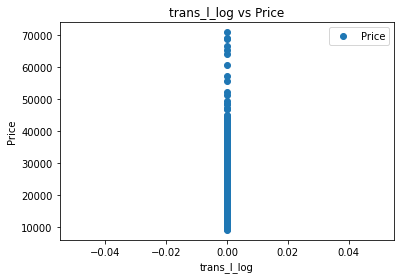

,trans_l_log,Price
trans_l_log,NaN,NaN
Price,NaN,1.0


In [34]:
df['trans_l_log'] = np.log(df['Leather'])#transofrming
df.plot(x='trans_l_log', y='Price', style='o')
plt.title('trans_l_log vs Price')
plt.xlabel('trans_l_log')
plt.ylabel('Price')
plt.show()
df[['trans_l_log','Price']].corr()

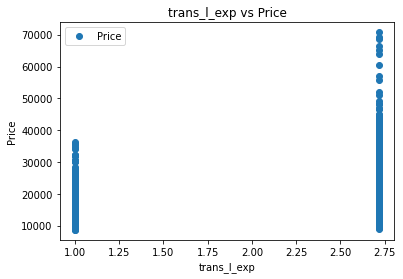

,trans_l_exp,Price
trans_l_exp,1.000000,0.157197
Price,0.157197,1.000000


In [35]:
df['trans_l_exp'] = np.exp(df['Leather'])#transofrming
df.plot(x='trans_l_exp', y='Price', style='o')
plt.title('trans_l_exp vs Price')
plt.xlabel('trans_l_exp')
plt.ylabel('Price')
plt.show()
df[['trans_l_exp','Price']].corr()

# There is no linear relationship even after the transformation.so,cannot apply linear regression.

# **Tasks, Part 1**

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Splitting and Model Training

In [36]:
#splitting
X = df[['Mileage']].values 
y = df['Price'].values 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

#model training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print("Co-efficient (M):",regressor.coef_)
print("Intercept (c):",regressor.intercept_)

Co-efficient (M): [-0.19547339]
Intercept (c): 25042.192672244048


# **1. Find the linear regression equation for mileage vs price.**

In [37]:
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Price) + {regressor.intercept_} ")

Linear Regression Equation y_pred = ([-0.19547339] * Price) + 25042.192672244048 


# **2. Chart the original data and the equation on the chart.**

In [38]:
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_1.head()

,Actual,Predicted
0,20986.016017,19745.645623
1,23420.706948,21345.790816
2,15731.132897,21038.115696
3,18912.981598,20837.169048
4,21335.852485,23041.131551


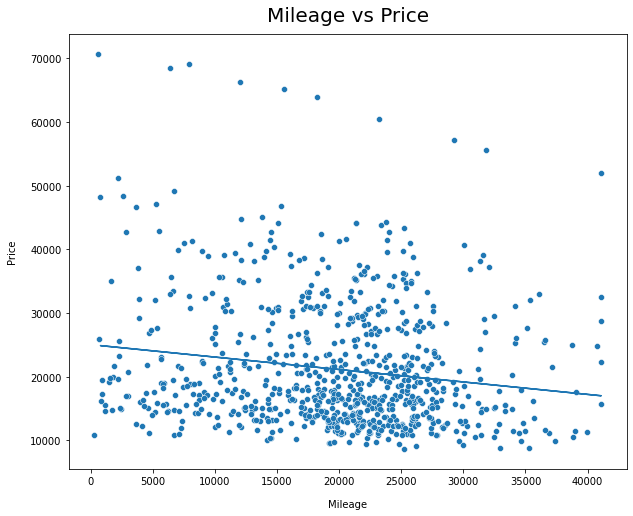

In [39]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Mileage vs Price", y=1.015, fontsize=20)
plt.xlabel("Mileage", labelpad=13)
plt.ylabel("Price", labelpad=13)
ax = plt.gca()
plt.plot(X_test,regressor.predict(X_test))

# **3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [40]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print("Here R(square) value is less than (0.5).so,this is not good model")

R2- SCORE: 0.005693425218045611
Here R(square) value is less than (0.5).so,this is not good model


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.


# Splitting , Scalling and Model fitting.

In [41]:
X = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values #array of features
y = df['Price'].values #array of targets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

coeff_df = pd.DataFrame(regressor.coef_,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'], columns=['Coefficient'])
y_pd = regressor.predict(X_test_scaled)



# **1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [42]:
print("regressor.intercept (c):",regressor.intercept_) 
print("regressor.coef(m):",regressor.coef_)
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Mileage) + {regressor.intercept_} ")

regressor.intercept (c): 21435.909487564448
regressor.coef(m): [-1494.44879423  4894.73942887  -189.69569615 -1053.45375437
  2720.54371915  -927.15614222  1708.88265799]
Linear Regression Equation y_pred = ([-1494.44879423  4894.73942887  -189.69569615 -1053.45375437
  2720.54371915  -927.15614222  1708.88265799] * Mileage) + 21435.909487564448 


In [43]:
df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pd})
df_2.head()

,Actual,Predicted
0,14862.093870,26734.425200
1,16256.236168,23104.174272
2,15802.652861,10406.768070
3,45061.951935,33316.061095
4,12425.389171,14394.497677


# **2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [44]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pd))

R2- SCORE: 0.36719589445770173


# **3. Find the combination of the factors that is the best predictor for price.**

In [45]:
coeff_df

,Coefficient
Mileage,-1494.448794
Cylinder,4894.739429
Liter,-189.695696
Doors,-1053.453754
Cruise,2720.543719
Sound,-927.156142
Leather,1708.882658


# **In this cylinder is Best predictor for price.Beacuse,It has high co-efficient.**

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [46]:
od.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [47]:
od.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [48]:
od['Type']= od['Type'].map({'Hatchback': 1, 'Coupe': 2, 'Sedan': 3, 'Wagon': 4, 'Convertible': 5})
od

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [49]:
od['Model']= od['Model'].map({'Century':1, 'Lacrosse':2, 'Lesabre':3, 'Park Avenue':4, 'CST-V':5, 'CTS':6,
       'Deville':7, 'STS-V6':8, 'STS-V8':9, 'XLR-V8':10, 'AVEO':11, 'Cavalier':12,
     'Classic':13, 'Cobalt':14, 'Corvette':15, 'Impala':16, 'Malibu':17, 'Monte Carlo':18,
       'Bonneville':19, 'G6':20, 'Grand Am':21, 'Grand Prix':22, 'GTO':23, 'Sunfire':24,
       'Vibe':25, '9_3':26, '9_3 HO':27, '9_5':28, '9_5 HO':29, '9-2X AWD':30, 'Ion':31,
       'L Series':32})
od

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,1,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,1,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,1,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,1,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,1,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,32,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,32,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,32,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,32,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [50]:
od['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [51]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.8 MB/s 


In [52]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'Make':['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn']})
encoder=ce.OneHotEncoder(cols='Make',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Make
0,Buick
1,Cadillac
2,Chevrolet
3,Pontiac
4,SAAB
5,Saturn


In [53]:
od=encoder.fit_transform(od)

In [54]:
od.head()

,Price,Mileage,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,0,1


In [55]:
del od['Trim']

# Outlier 

{'boxes': [<matplotlib.lines.Line2D at 0x7fc1c713aa50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1c713ba50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1c713da90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1c713d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1c713af90>,
  <matplotlib.lines.Line2D at 0x7fc1c713b510>]}

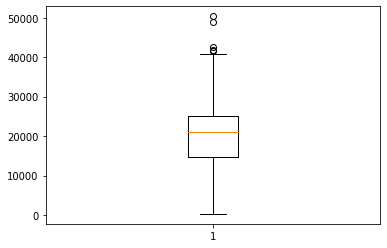

In [56]:
plt.boxplot(od['Mileage'])

In [57]:
percentile25 = od['Mileage'].quantile(0.25)
percentile75 = od['Mileage'].quantile(0.75)
iqr=percentile75 - percentile25
print("IQR is ",iqr)
print("25th Percentile of the Mileage data--->",percentile25)
print("75th Percentile of the Mileage data--->",percentile75)

IQR is  10589.5
25th Percentile of the Mileage data---> 14623.5
75th Percentile of the Mileage data---> 25213.0


In [58]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper_limit ----->",upper_limit)
print("lower_limit ----->",lower_limit)

upper_limit -----> 41097.25
lower_limit -----> -1260.75


In [59]:
od['Mileage'] = np.where(od['Mileage']>upper_limit,upper_limit,od['Mileage'])
od['Mileage'] = np.where(od['Mileage']<lower_limit,lower_limit,od['Mileage'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fc1bbe09850>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc1bbe0b810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1bbe0e850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1bbe0e310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1bbe09d50>,
  <matplotlib.lines.Line2D at 0x7fc1bbe0b2d0>]}

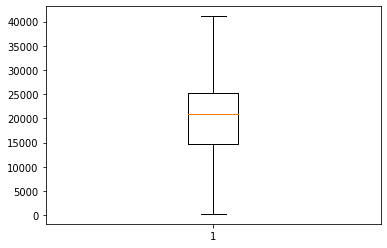

In [60]:
plt.boxplot(od['Mileage'])

In [61]:
od.head()

,Price,Mileage,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,1,1
1,17542.036083,9135.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,1,0
2,16218.847862,13196.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,1,0
3,16336.913140,16342.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,0,0
4,16339.170324,19832.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,0,1


In [62]:
od.corr()

,Price,Mileage,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.146283,-0.017768,0.659297,-0.404598,-0.142095,0.335404,-0.211701,-0.084207,0.484443,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.146283,1.000000,0.025439,-0.037998,-0.015180,-0.028892,0.050406,0.018501,0.025238,0.034427,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Make_Buick,-0.017768,0.025439,1.000000,-0.110497,-0.270289,-0.159196,-0.135115,-0.094398,-0.562671,0.044748,0.175317,0.188093,0.184913,0.190645,-0.011824,-0.212930
Make_Cadillac,0.659297,-0.037998,-0.110497,1.000000,-0.270289,-0.159196,-0.135115,-0.094398,-0.376131,0.138440,0.534896,0.406216,0.087104,0.190645,-0.091932,0.205301
Make_Chevrolet,-0.404598,-0.015180,-0.270289,-0.270289,1.000000,-0.389412,-0.330507,-0.230909,-0.262633,-0.434844,-0.157535,-0.124052,-0.145813,-0.293190,0.259566,0.155492
Make_Pontiac,-0.142095,-0.028892,-0.159196,-0.159196,-0.389412,1.000000,-0.194664,-0.136002,0.274255,0.064470,0.114436,0.113863,0.040943,0.000939,-0.074314,-0.089854
Make_SAAB,0.335404,0.050406,-0.135115,-0.135115,-0.330507,-0.194664,1.000000,-0.115430,0.508594,0.432582,-0.371877,-0.326754,-0.025680,0.233118,-0.087209,0.003809
Make_Saturn,-0.211701,0.018501,-0.094398,-0.094398,-0.230909,-0.136002,-0.115430,1.000000,0.476875,-0.068493,-0.191548,-0.180941,-0.064852,-0.199044,-0.139371,-0.152794
Model,-0.084207,0.025238,-0.562671,-0.376131,-0.262633,0.274255,0.508594,0.476875,1.000000,0.188437,-0.412403,-0.345197,-0.158757,-0.088664,-0.114323,-0.070498
Type,0.484443,0.034427,0.044748,0.138440,-0.434844,0.064470,0.432582,-0.068493,0.188437,1.000000,0.001811,0.012161,0.057149,0.241219,-0.152614,-0.076868


In [63]:
od.columns

Index(['Price', 'Mileage', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

# Splitting

In [64]:
X = od[['Mileage', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_SAAB', 'Make_Saturn', 'Model', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values #array of features
y = od['Price'].values #array of targets

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scalling

In [66]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Model Fitting

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
y_pred = regressor.predict(X_test_scaled)

In [69]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
0,9482.219404,9998.195737
1,10921.945372,5865.557960
2,33220.028446,41529.453745
3,31153.008960,29951.441950
4,13678.863003,15547.194327


# Evaluation Metrics

In [70]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9106710431230473


# **When we use this features Mileage,Make_Cadillac,Make_Chevrolet,Make_SAAB, Make_Saturn,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather for our model we Get high R(square) value.So,this are the best combination of factors to predict price.**